In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#just load the dataset
data=pd.read_csv('/kaggle/input/world-happiness-report-2022/World Happiness Report 2022.csv')
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
#Checking the data information
data.shape

(146, 12)

In [4]:
#Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [5]:
#Checking the null values in the dataset
data.isna().sum()/len(data)

RANK                                          0.0
Country                                       0.0
Happiness score                               0.0
Whisker-high                                  0.0
Whisker-low                                   0.0
Dystopia (1.83) + residual                    0.0
Explained by: GDP per capita                  0.0
Explained by: Social support                  0.0
Explained by: Healthy life expectancy         0.0
Explained by: Freedom to make life choices    0.0
Explained by: Generosity                      0.0
Explained by: Perceptions of corruption       0.0
dtype: float64

# No null values in the dataset let's do some visualization with the data

# Explore data Analysis

In [6]:
#Let's check the unique values in the dataset
for val in data.columns:
    print(val,"-->",data[val].nunique())

RANK --> 146
Country --> 146
Happiness score --> 141
Whisker-high --> 144
Whisker-low --> 141
Dystopia (1.83) + residual --> 138
Explained by: GDP per capita --> 141
Explained by: Social support --> 133
Explained by: Healthy life expectancy --> 134
Explained by: Freedom to make life choices --> 128
Explained by: Generosity --> 116
Explained by: Perceptions of corruption --> 116


Text(893.7335858585857, 0.5, 'Happiness score')

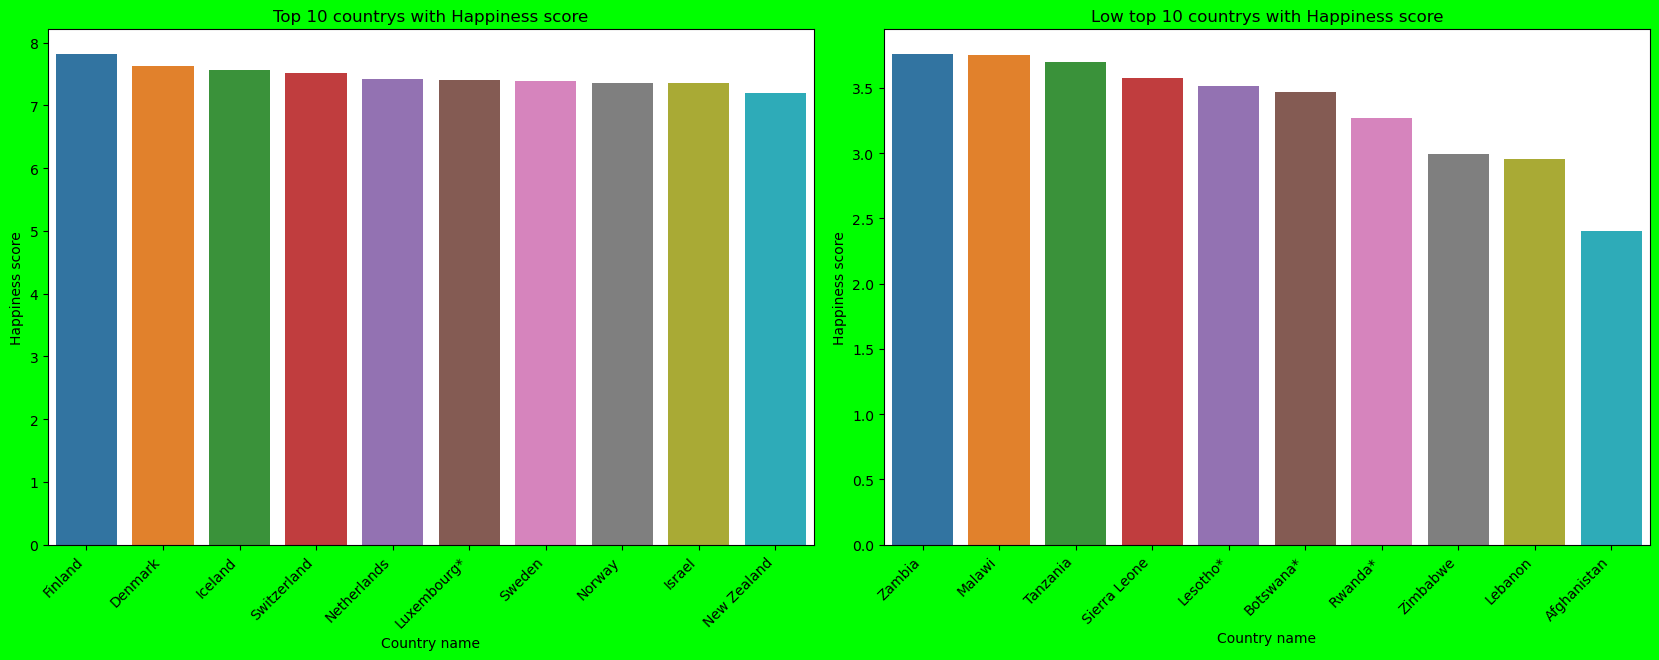

In [7]:
#Let's visualize the top_10 and bottom 10 country in the dataset
top_10=data.head(10)
bottom_10=data.tail(10)
plt.rcParams['figure.figsize']=(15,6)
plt.rcParams['figure.facecolor']='lime'
fig,axes=plt.subplots(1,2, figsize=(17,6))
plt.tight_layout(pad=2)
top_10_names=top_10.Country
axes[0].set_title('Top 10 countrys with Happiness score')
axes[0].set_xticklabels(top_10_names,rotation=45,ha='right')
sns.barplot(x=top_10.Country,y=top_10['Happiness score'],ax=axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Happiness score')
#go and visualize the bottom of the countrys
axes[1].set_title("Low top 10 countrys with Happiness score")
axes[1].set_xticklabels(bottom_10.Country,rotation=45,ha='right')
sns.barplot(x=bottom_10.Country,y=bottom_10['Happiness score'],ax=axes[1])
axes[1].set_xlabel('Country name')
axes[1].set_ylabel('Happiness score')

Text(0, 0.5, 'Explained by: GDP per capita')

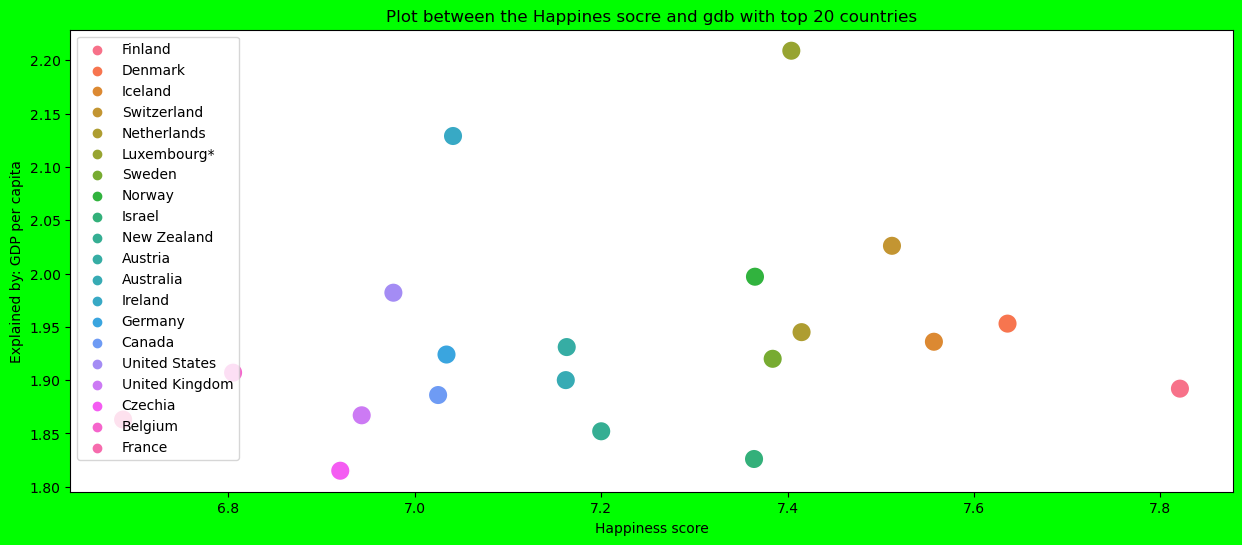

In [8]:
plt.title("Plot between the Happines socre and gdb with top 20 countries")
sns.scatterplot(x=data['Happiness score'][:20],y=data['Explained by: GDP per capita'][:20],hue=data.Country[:20],s=200)
plt.legend(loc='upper left',fontsize=10)
plt.xlabel('Happiness score')
plt.ylabel('Explained by: GDP per capita')

Text(0, 0.5, ' ')

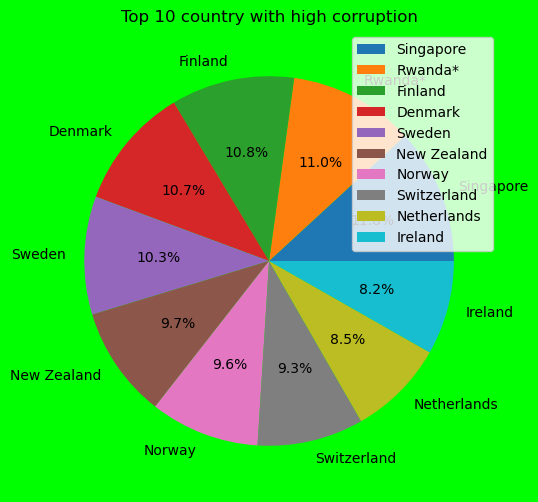

In [9]:
coruption=data.groupby('Country')[['Explained by: Perceptions of corruption']].mean().sort_values(by='Explained by: Perceptions of corruption',ascending=False)
coruption.head(10).plot.pie(autopct='%1.1f%%',subplots=True)
plt.title("Top 10 country with high corruption")
plt.ylabel(' ')




Text(0, 0.5, ' ')

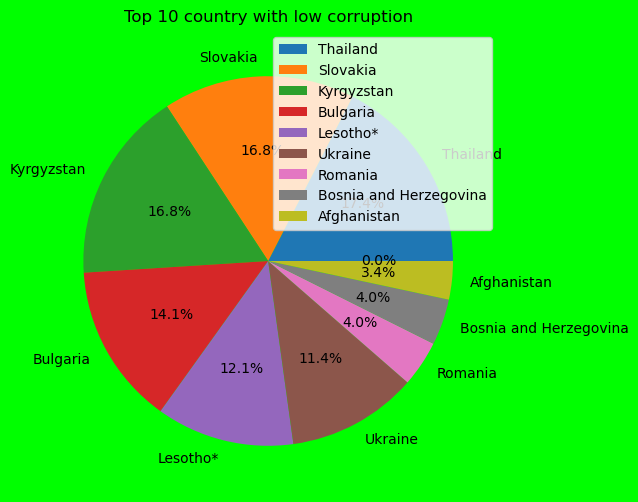

In [10]:
coruption.tail(10).plot.pie(autopct='%1.1f%%',subplots=True)
plt.title("Top 10 country with low corruption")
plt.ylabel(' ')